<a href="https://colab.research.google.com/github/JihedSioud/ML-DL-examples/blob/main/Supervised_Learning_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 - Supervised Learning - Classification

The purpose of this assignment is to use machine learning algorithms to classify data points which have a **label**. We will classify the dataset below, which consists in 4 clusters. For this assignment, your objective is to try out 2-3 classification methods, justifying why you picked up these methods and fine-tuning a bit their parameters.

The dataset is produced with the first two block of code (below): the first one imports the necessary modules and the second generates the dataset `X, y`.


In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

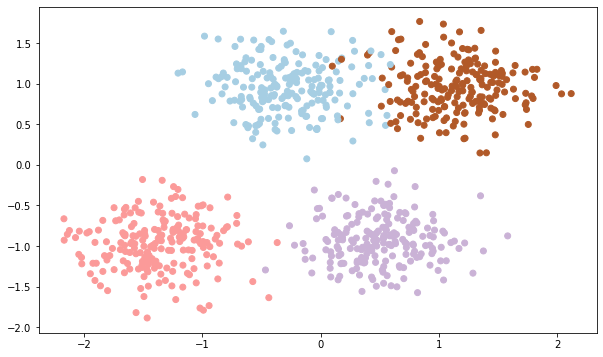

In [ ]:
centers = [[0.5, 2], [-1, -1], [1.5, -1], [2.5, 2]] #Create dataset
X, y = make_blobs(n_samples=800, centers=centers, 
                  cluster_std=0.5, random_state=0) #Normalize the values
X = StandardScaler().fit_transform(X)

plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='Paired')

## Testing your classifier

The function below can be used to test the classifier: it shows the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and returns the fraction of points that have been correctly classified.

In [ ]:
def analyse_classifier(model, X, y):
  yPred = model.predict(X)
  from sklearn.metrics import confusion_matrix
  cm = confusion_matrix(y, yPred)
  import matplotlib.pyplot as plt
  %matplotlib inline
  import seaborn as sns; sns.set()
  sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
  plt.xlabel('true label')
  plt.ylabel('predicted label');
  nTotal = len(y)
  nCorrect = np.count_nonzero(y-yPred==0)
  print(f"Correcly classified {nCorrect} out of {nTotal} points ({nCorrect/nTotal*100}%)")

As an example to get started, have a look at the code below, and answer the following questions.

*Suggestions:*
- *to put your answer, edit the text and put it between the two groups of `**` which make the text in bold (please preserve `Answer:` part).*
- *if you need to use code (you'll often need to), just create new Text and Code blocks as needed, even multiple, below. Do not forget to properly comment things in the text part as well as in the code using `# This is a comment`*

Questions:
1. What is the classified being trained? What does it do? What do the options mean? 
2. How well does the classifier perform? Can we do better? How?
3. Can you describe the algorithm another way? Making use of two pieces ?


Correcly classified 790 out of 800 points (98.75%)


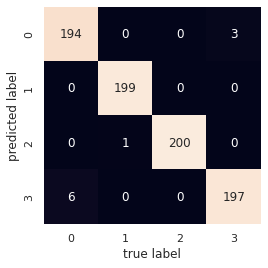

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Instantiating a random forest classifier
model_1 = RandomForestClassifier(n_estimators=1, random_state=0)
# Fitting the model to our datapoints
model_1.fit(X, y)
# Evaluate the classifier
analyse_classifier(model_1, X, y)

1. What is the classified being trained? What does it do? What do the options mean?

**Answer:the classifier being trained is a random forest classifier that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.**



**In this exemple we used n_estimators which tells our model how many decision trees to generate, and random_state that Controls both the randomness of the bootstrapping of the samples used when building trees**

2. How well does the classifier perform? Can we do better? How?

**Answer:**
**We can inspect our classifier**

In [ ]:
from sklearn.metrics import classification_report
y_pred = model_1.predict(X)

print(classification_report(y, y_pred, digits=8 ))


              precision    recall  f1-score   support

           0  0.98477157 0.97000000 0.97732997       200
           1  1.00000000 0.99500000 0.99749373       200
           2  0.99502488 1.00000000 0.99750623       200
           3  0.97044335 0.98500000 0.97766749       200

    accuracy                      0.98750000       800
   macro avg  0.98755995 0.98750000 0.98749936       800
weighted avg  0.98755995 0.98750000 0.98749936       800



**We can see that the model is overfitting for 2 reasons the first one is the fact that weare not splitting our data into training and test datasets (Generalisation problem) and the second reason is the use of the parameter n_estimator=1 which is equivalent of using a simple decision tree classifier**

**We can create a function that visualizes our model**

In [ ]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    # Setting up axes
    ax = ax or plt.gca()
    
    # Plot the training points X and coloured by y (c=y)
    # X[:,0] is the x1 coordinate and X[:,1] is the x2 coordinate
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)

    # Create a 2D grid 200x200 of your data space (x1, x2)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    
    # Z is model prediction for grid (xx and yy)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

<ipython-input-6-5fd211eba685>:26: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


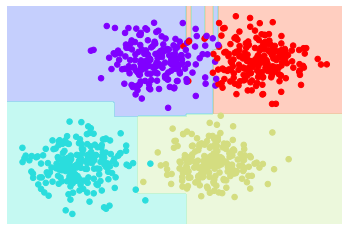

In [ ]:
visualize_classifier(model_1, X, y)

**the model performs well according to its accuracy metric but suffers from some very narrow regions, due to outliers.To improve it we can  start by using a realRadom tree forst with n_estimators > 1**

First attempt at improvement of the classifier used above.

Correcly classified 800 out of 800 points (100.0%)


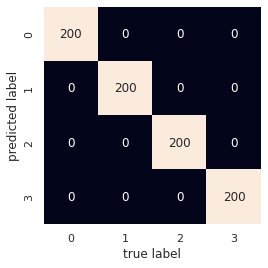

In [ ]:
model_2 = RandomForestClassifier(n_estimators=20, random_state=0)
model_2.fit(X, y)
analyse_classifier(model_2, X, y)

<ipython-input-6-5fd211eba685>:26: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


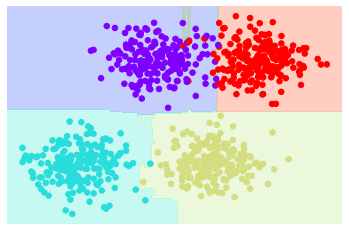

In [ ]:
visualize_classifier(model_2, X, y)

**we can see that we have a 100 percent accuracy but we are overfiiting our model** 

Another attempt 



Correcly classified 798 out of 800 points (99.75%)


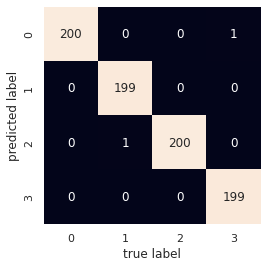

In [ ]:
model_3 = RandomForestClassifier(n_estimators=10, random_state=0,max_depth=12)
model_3.fit(X, y)
analyse_classifier(model_3, X, y)

<ipython-input-6-5fd211eba685>:26: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


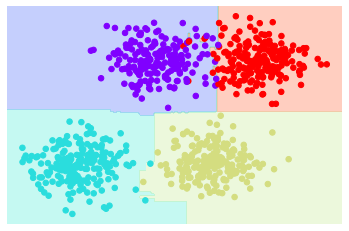

In [ ]:
visualize_classifier(model_3, X, y)

**We can see that by tuning the params of our model we have a slightly better version which is more robust against noise**

3. Can you describe the algorithm another way? Making explicit of the two pieces (algorithms) used ?

**Answer:As a randomforstclassifier is multiple bagged decision trees by definition**

Correcly classified 797 out of 800 points (99.625%)


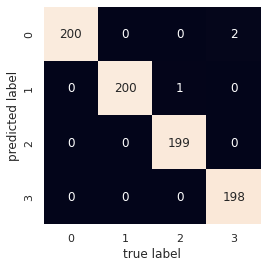

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
model_4 = BaggingClassifier(tree, n_estimators=10, max_samples=0.8,random_state=0)

model_4.fit(X, y)
analyse_classifier(model_4, X, y)

## Properly using the dataset for machine learning

1. What can you tell me about the way we've been using the dataset so far ? Is it appropriate ?

**Answer:That was an inaproprate way to use the dataset because we were training our models with the whole data and no test dataset**

2. What can you tell me about the multiple ways one can split the dataset to train machine learning algorithms ?

**Answer:<br>We can splitour data into: <br> Train Dataset: Used to fit the machine learning model.<br>
Test Dataset: Used to evaluate the fit machine learning model.<br><br> common split percentages include:
<br>
Train: 80%, Test: 20%<br>
Train: 67%, Test: 33%<br>
Train: 50%, Test: 50%<br><br>**

3. When a small amount of data is available, are there alternative methods that can be used, rather than splitting the dataset? Please explain.

**Answer:<br>If we have insufficient data, then a suitable alternate model evaluation procedure would be the k-fold cross-validation procedure.
<br>The general procedure is as follows:**
<br>
<br>**Shuffle the dataset randomly.
<br>Split the dataset into k groups
<br>For each unique group:
<br>Take the group as a hold out or test data set
<br>Take the remaining groups as a training data set
<br>Fit a model on the training set and evaluate it on the test set
<br>Retain the evaluation score and discard the model
<br>Summarize the skill of the model using the sample of model evaluation scores
<br><br>**
**Another alternative model would be Provides train/test indices to split data in train/test sets. Each sample is used once as a test set (singleton) while the remaining samples form the training set.<br>**

**LeaveOneOut() is equivalent to KFold(n_splits=n) and LeavePOut(p=1) where n is the number of samples.**
<br><br>
**In addition to dataset size, another reason to use the train-test split evaluation procedure is computational efficiency specialyy for the leave one out method**<br><br>


In the cases below, the example code doesn't take into account any splitting. Please split the data accordingly (using examples from tutorials or from the internet), and don't forget to adjust the code examples accordingly, so as to fit and evaluate the model on different datasets.

In [ ]:
# Code to split the dataset appropriately
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=2) 


## Trying out other algorithms

Please try out different algorithms and see whether they perform better or worse, and try to explain why that might be, and whether there's something that can be done to improve the situation.

### Alternative Algorithm #1

Please briefly describe the algorithm, and explain what it attempts to do. If needed, you can create multiple other models with different settings and compare them to explain your thought process.

**Answer:**

In [ ]:
from sklearn.model_selection import GridSearchCV # we impoort grid cv so we can pass a dict that contains hyperparams and thee model will test them znd print thhee best one

{'booster': 'gbtree', 'max_depth': 1, 'n_estimators': 100}
Correcly classified 157 out of 160 points (98.125%)


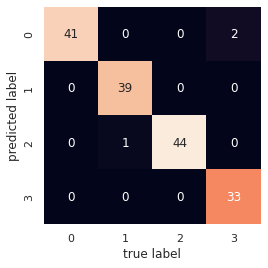

In [ ]:
from xgboost import XGBClassifier #Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree
param_grid = {
             'max_depth': np.arange(1,6),
             'n_estimators':[50,100],
              'booster': ['gbtree', 'gblinear','dart']
              }#We create a dict with some plausible parameters to test

model_5 = GridSearchCV(XGBClassifier(random_state=0), param_grid=param_grid, cv=10) #we search for the optiml params
model_5.fit(X_train, y_train)
print(model_5.best_params_)
analyse_classifier(model_5, X_test, y_test)

**XGBoost (eXtreme Gradient Boosting) is an ensemble learning algorithm that is used for supervised learning problems, such as classification and regression. It is an implementation of gradient boosting that is optimized for speed and performance. XGBoost uses a tree-based learning algorithm, where decision trees are used to model the relationship between the input and output variables. The algorithm iteratively adds new decision trees to the model, each of which is trained to correct the mistakes of the previous trees.**

**GridSearchCV is a method to perform hyperparameter tuning in a model. It works by training the model with a set of different combinations of hyperparameters, and then evaluating the model's performance using cross-validation. The best combination of hyperparameters is then selected based on the model's performance.**

**We used XGBoost with GridSearchCV in order to improve the performance of the model. XGBoost is known to be a powerful algorithm for supervised learning problems, especially for high-dimensional data. However, like any other algorithm, it has several hyperparameters that need to be fine-tuned to achieve optimal performance. GridSearchCV is used to find the best combination of these hyperparameters by training the model with different combinations of them and evaluating the performance on the validation set. This allows to find the best set of parameters to improve the performance of XGBoost algorithm on the specific dataset we have.** 
**We can see that  with the optimized parameters xgboost algorithm is still performing fearly well but with a high computation penality compared to other simpler classifiers we can conclude that xgboost is not suited for this specific task** 

### Alternative Algorithm #2

Please briefly describe the algorithm, and explain what it attempts to do. If needed, you can create multiple other models with different settings and compare them to explain your thought process.

**Answer:we will try again the decision tree algorithm but with optimized parameter using grid cv**

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2}
Correcly classified 158 out of 160 points (98.75%)


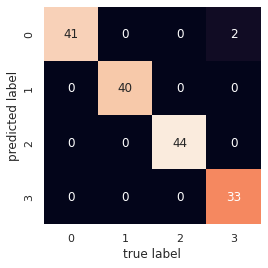

In [ ]:
param_grid = {'criterion': ['gini', 'entropy'],
             'max_depth': np.arange(1,15),
              'min_samples_leaf': np.arange(1,5)}
#We create a dict with some plausible parameters to test

model_6 = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, scoring='accuracy', cv=20) #we search for the optiml params
model_6.fit(X_train, y_train)
print(model_6.best_params_)
analyse_classifier(model_6, X_test, y_test)

**Using this classifier yelded similar(slightly better) results as the XGB usd previously but with much faster computation time which makes it a more suitable algorithm**

### Alternative Algorithm #3

Please briefly describe the algorithm, and explain what it attempts to do. If needed, you can create multiple other models with different settings and compare them to explain your thought process.

**Answer:we will try to use KNN classifier which uses proximity to make classifications or predictions about the grouping of an individual data point. While it can be used for either regression or classification problems, it is typically used as a classification algorithm, working off the assumption that similar points can be found near one another**

Correcly classified 156 out of 160 points (97.5%)


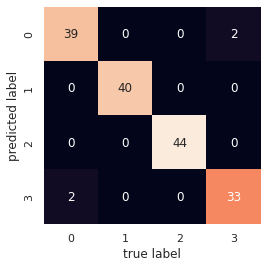

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(p=1,leaf_size=1 ) #we use some random but plausible parameters for the classifier
knn_model = knn.fit(X_train, y_train)
#y_pred_knn = knn_model.predict(X_test)
analyse_classifier(knn_model, X_test, y_test)


in this section  we will use grid cv to geet the optimal hyperparameters
Fitting 20 folds for each of 132 candidates, totalling 2640 fits
{'leaf_size': 1, 'n_neighbors': 4, 'p': 1}
Correcly classified 157 out of 160 points (98.125%)


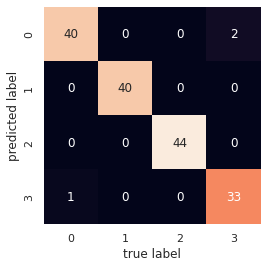

In [ ]:
print("in this section  we will use grid cv to geet the optimal hyperparameters")



param_grid = {
             'n_neighbors': np.arange(1,7) ,
             'leaf_size': np.arange(1,12),
             'p': [1,2]
             }
 
grid = GridSearchCV(knn, param_grid, cv=20, scoring='accuracy', return_train_score=False,verbose=1) # defining parameter range
  
model_7=grid.fit(X_train, y_train) # fitting the model for grid search
print(model_7.best_params_)
analyse_classifier(model_7, X_test, y_test)

**We can  see that with the optimized parameters all 3 algorithm performed similarly**

## Handling small datasets

Above, we discussed how to handle small datasets. Assuming `X` is a small dataset, please show me how to use a method that can use it in full, yet remain safe in terms of implementation.

In [ ]:
from sklearn.model_selection import LeaveOneOut,cross_val_score

# create loocv procedure
cv = LeaveOneOut()
model_small=DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2)
score=cross_val_score(model_small,X,y,cv=cv)
print("Average Cross Validation score :{}".format(score.mean()))

Average Cross Validation score :0.98625


## Assuming the dataset is not labeled

Let's assume that you were given ONLY `X`, i.e. you don't know the *label* of these data points.

1. Can you use the same machine learning methods? What do you need to change?

**Answer:In machine learning, there are several techniques that can be used to classify non-labeled datasets, which are also known as unsupervised learning so the supervised larning algorithms used above can not work**

2. Can you pick a model that you could use if only given `X` ? Please implement one version (in the block below).

**Answer:we can use GaussianMixtureGaussianMixture which is a type of unsupervised machine learning algorithm used for clustering and density estimation. It is a probabilistic model that assumes that the data is generated from a mixture of Gaussian distributions. The algorithm tries to find the parameters of these Gaussian distributions, such as the mean and covariance, that best fit the data.**

**The GaussianMixture algorithm works by iteratively assigning each observation to one of the Gaussian distributions based on the likelihood of the observation given the current estimates of the Gaussian parameters. The algorithm then updates the parameters of the Gaussian distributions based on the observations that have been assigned to them. This process is repeated until the parameters of the Gaussian distributions converge.**

**One of the main advantages of GaussianMixture is that it can identify clusters with different shapes and densities. This makes it a useful tool for handling non-linearly separable data and datasets with more than one modality. GaussianMixture also can estimate the probability of each point to belong to each cluster, rather than just assigning points to a cluster like k-means.**

**Another advantage is it can work with continuous variables, unlike k-means which is based on Euclidean distance and works only with numerical variables.**

**It is also a generative model, which means it can generate new samples from the learned distribution.**

In [ ]:
# Code block to implement model that would group points without knowing their label
from sklearn.mixture import GaussianMixture

model_8 = GaussianMixture(n_components=4,n_init=4, random_state=4,tol=0.000000005).fit(X)
model_8.fit(X) 

GaussianMixture(n_components=4, n_init=4, random_state=4, tol=5e-09)

Let's check how your algorithm performs (running the code below). Are you happy with the result?

**Answer: The model performed well even though it did not account for some of the noise that could be conciered with the supervised learning algorithms used above**

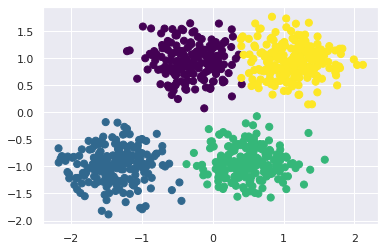

In [ ]:
def show_model_prediction(model, X):
  labels = model.fit_predict(X)
  plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

# Uncomment to plot
show_model_prediction(model_8, X)

# Wrapping up

*Note: use this space for thoughts; this part is not part of the mark (unless you don't fill it at all).*

What did you take out from this?

**Answer:Different classifiers can yeld good results in supervised learning as long as we evaluate the size and the distribution of our data and act accordingly**